In [56]:
import numpy as np
import pandas as pd
import scipy as scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt


%matplotlib inline
df1= pd.read_csv("datafile (1).csv", low_memory=False)

In [57]:
#cc=cultivation cost
#CC1= A2+FL/Hectare
#CC2= C2/Hectare
#CC3= C2/Quintal
#Yield=(Quintal/ Hectare)

df1.columns=[
            'Crop',
            'State',
            'CC1',
            'CC2',
            'CC3',
            'Yield',
            ]
df1
#How can I remove the final column producing 1?
#If i remove the last column the axis becomes 6
#and I get a syntax error

,Crop,State,CC1,CC2,CC3,Yield
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72
5,COTTON,Maharashtra,23711.44,33116.82,2539.47,12.69
6,COTTON,Punjab,29047.10,50828.83,2003.76,24.39
7,COTTON,Andhra Pradesh,29140.77,44756.72,2509.99,17.83
8,COTTON,Gujarat,29616.09,42070.44,2179.26,19.05
9,COTTON,Haryana,29918.97,44018.18,2127.35,19.90


In [58]:
df1.shape

(49, 6)

In [59]:
df1.describe()

,CC1,CC2,CC3,Yield
count,49.000000,49.000000,49.000000,49.000000
mean,20363.537347,31364.666735,1620.537755,98.086735
std,13561.435306,20095.783569,1104.990472,245.293123
min,5483.540000,7868.640000,85.790000,1.320000
25%,12774.410000,19259.840000,732.620000,9.590000
50%,17022.000000,25909.050000,1595.560000,13.700000
75%,24731.060000,35423.480000,2228.970000,36.610000
max,66335.060000,91442.630000,5777.480000,1015.450000


In [60]:
df1.isnull().values.any() 

False

In [55]:
df1.loc[:, "Crop"]

0                    ARHAR
1                    ARHAR
2                    ARHAR
3                    ARHAR
4                    ARHAR
5                   COTTON
6                   COTTON
7                   COTTON
8                   COTTON
9                   COTTON
10                    GRAM
11                    GRAM
12                    GRAM
13                    GRAM
14                    GRAM
15               GROUNDNUT
16               GROUNDNUT
17               GROUNDNUT
18               GROUNDNUT
19               GROUNDNUT
20                   MAIZE
21                   MAIZE
22                   MAIZE
23                   MAIZE
24                   MAIZE
25                   MOONG
26                   MOONG
27                   MOONG
28                   MOONG
29                   MOONG
30                   PADDY
31                   PADDY
32                   PADDY
33                   PADDY
34                   PADDY
35    RAPESEED AND MUSTARD
36    RAPESEED AND MUSTARD
3

In [61]:
CropGroup= df1.groupby(['Crop','State','Yield'])
CropGroup.max()

CC1       CC2      CC3
Crop                 State          Yield                               
ARHAR                Andhra Pradesh 6.42     17051.66  24171.65  3670.54
                     Gujarat        9.59     13468.82  19551.90  1898.30
                     Karnataka      7.47     10593.15  16528.68  2172.46
                     Maharashtra    8.72     17130.55  25270.26  2775.80
                     Uttar Pradesh  9.83      9794.05  23076.74  1941.55
COTTON               Andhra Pradesh 17.83    29140.77  44756.72  2509.99
                     Gujarat        19.05    29616.09  42070.44  2179.26
                     Haryana        19.90    29918.97  44018.18  2127.35
                     Maharashtra    12.69    23711.44  33116.82  2539.47
                     Punjab         24.39    29047.10  50828.83  2003.76
GRAM                 Andhra Pradesh 16.69    14421.98  26762.09  1559.04
                     Madhya Pradesh 10.29     9803.89  16873.17  1551.94
                     Maharashtra    8.05     12985.95  18679.33  2277.68
                     Rajasthan      6.83      8552.69  12610.85  1691.66
                     Uttar Pradesh  10.93    12833.04  21618.43  1882.68
GROUNDNUT            Andhra Pradesh 11.97    21229.01  30434.61  2554.91
                     Gujarat        13.45    22951.28  30114.45  1918.92
                     Karnataka      4.71     13647.10  17314.20  3484.01
                     Maharashtra    9.33     26078.66  32683.46  3207.35
                     Tamil Nadu     11.98    22507.86  30393.66  2358.00
MAIZE                Andhra Pradesh 42.68    25687.09  37801.85   840.58
                     Bihar          42.95    13513.92  19857.70   404.43
                     Karnataka      31.10    13792.85  20671.54   581.69
                     Rajasthan      23.56    14421.46  19810.29   658.77
                     Uttar Pradesh  13.70    15635.43  21045.11  1387.36
MOONG                Andhra Pradesh 5.90      6684.18  13209.32  2228.97
                     Karnataka      1.32      6440.64   7868.64  5777.48
                     Maharashtra    6.70     10780.76  15371.45  2261.24
                     Orissa         3.01      5483.54   8266.98  2614.14
                     Rajasthan      4.05      6204.23   9165.59  2068.67
PADDY                Andhra Pradesh 56.00    29664.84  46450.20   789.90
                     Orissa         32.42    17478.05  25909.05   715.04
                     Punjab         67.41    25154.75  45291.24   669.86
                     Uttar Pradesh  36.61    17022.00  28144.50   732.62
                     West Bengal    39.04    24731.06  33046.12   731.25
RAPESEED AND MUSTARD Gujarat        11.61    13740.64  19083.55  1610.40
                     Haryana        19.94    14715.27  27507.54  1251.12
                     Madhya Pradesh 12.94     8686.43  17705.93  1279.60
                     Rajasthan      13.54    11385.70  19259.84  1341.29
                     Uttar Pradesh  13.57    12774.41  22560.30  1595.56
SUGARCANE            Andhra Pradesh 757.92   56621.16  91442.63   119.72
                     Karnataka      986.21   55655.44  86765.77    86.53
                     Maharashtra    744.01   57673.60  85801.95   107.56
                     Tamil Nadu     1015.45  66335.06  89025.27    85.79
                     Uttar Pradesh  448.89   24538.32  45239.51    93.64
WHEAT                Madhya Pradesh 23.59    12464.40  22489.75   810.25
                     Punjab         39.83    17945.58  35423.48   804.80
                     Rajasthan      37.19    19119.08  29876.36   683.58
                     Uttar Pradesh  34.99    18979.38  31902.74   769.84

In [62]:
CropGroup.describe()

CC1                          \
                                            count      mean std       min   
Crop                 State          Yield                                   
ARHAR                Andhra Pradesh 6.42      1.0  17051.66 NaN  17051.66   
                     Gujarat        9.59      1.0  13468.82 NaN  13468.82   
                     Karnataka      7.47      1.0  10593.15 NaN  10593.15   
                     Maharashtra    8.72      1.0  17130.55 NaN  17130.55   
                     Uttar Pradesh  9.83      1.0   9794.05 NaN   9794.05   
COTTON               Andhra Pradesh 17.83     1.0  29140.77 NaN  29140.77   
                     Gujarat        19.05     1.0  29616.09 NaN  29616.09   
                     Haryana        19.90     1.0  29918.97 NaN  29918.97   
                     Maharashtra    12.69     1.0  23711.44 NaN  23711.44   
                     Punjab         24.39     1.0  29047.10 NaN  29047.10   
GRAM                 Andhra Pradesh 16.69     1.0  14421.98 NaN  14421.98   
                     Madhya Pradesh 10.29     1.0   9803.89 NaN   9803.89   
                     Maharashtra    8.05      1.0  12985.95 NaN  12985.95   
                     Rajasthan      6.83      1.0   8552.69 NaN   8552.69   
                     Uttar Pradesh  10.93     1.0  12833.04 NaN  12833.04   
GROUNDNUT            Andhra Pradesh 11.97     1.0  21229.01 NaN  21229.01   
                     Gujarat        13.45     1.0  22951.28 NaN  22951.28   
                     Karnataka      4.71      1.0  13647.10 NaN  13647.10   
                     Maharashtra    9.33      1.0  26078.66 NaN  26078.66   
                     Tamil Nadu     11.98     1.0  22507.86 NaN  22507.86   
MAIZE                Andhra Pradesh 42.68     1.0  25687.09 NaN  25687.09   
                     Bihar          42.95     1.0  13513.92 NaN  13513.92   
                     Karnataka      31.10     1.0  13792.85 NaN  13792.85   
                     Rajasthan      23.56     1.0  14421.46 NaN  14421.46   
                     Uttar Pradesh  13.70     1.0  15635.43 NaN  15635.43   
MOONG                Andhra Pradesh 5.90      1.0   6684.18 NaN   6684.18   
                     Karnataka      1.32      1.0   6440.64 NaN   6440.64   
                     Maharashtra    6.70      1.0  10780.76 NaN  10780.76   
                     Orissa         3.01      1.0   5483.54 NaN   5483.54   
                     Rajasthan      4.05      1.0   6204.23 NaN   6204.23   
PADDY                Andhra Pradesh 56.00     1.0  29664.84 NaN  29664.84   
                     Orissa         32.42     1.0  17478.05 NaN  17478.05   
                     Punjab         67.41     1.0  25154.75 NaN  25154.75   
                     Uttar Pradesh  36.61     1.0  17022.00 NaN  17022.00   
                     West Bengal    39.04     1.0  24731.06 NaN  24731.06   
RAPESEED AND MUSTARD Gujarat        11.61     1.0  13740.64 NaN  13740.64   
                     Haryana        19.94     1.0  14715.27 NaN  14715.27   
                     Madhya Pradesh 12.94     1.0   8686.43 NaN   8686.43   
                     Rajasthan      13.54     1.0  11385.70 NaN  11385.70   
                     Uttar Pradesh  13.57     1.0  12774.41 NaN  12774.41   
SUGARCANE            Andhra Pradesh 757.92    1.0  56621.16 NaN  56621.16   
                     Karnataka      986.21    1.0  55655.44 NaN  55655.44   
                     Maharashtra    744.01    1.0  57673.60 NaN  57673.60   
                     Tamil Nadu     1015.45   1.0  66335.06 NaN  66335.06   
                     Uttar Pradesh  448.89    1.0  24538.32 NaN  24538.32   
WHEAT                Madhya Pradesh 23.59     1.0  12464.40 NaN  12464.40   
                     Punjab         39.83     1.0  17945.58 NaN  17945.58   
                     Rajasthan      37.19     1.0  19119.08 NaN  19119.08   
                     Uttar Pradesh  34.99     1.0  18979.38 NaN  18979.38   

                                         

In [17]:
df1.set_index('State').groupby(['Crop']).apply(lambda x: x['Yield'].sort_values()).reset_index()

,Crop,State,Yield
0,ARHAR,Andhra Pradesh,6.42
1,ARHAR,Karnataka,7.47
2,ARHAR,Maharashtra,8.72
3,ARHAR,Gujarat,9.59
4,ARHAR,Uttar Pradesh,9.83
5,COTTON,Maharashtra,12.69
6,COTTON,Andhra Pradesh,17.83
7,COTTON,Gujarat,19.05
8,COTTON,Haryana,19.90
9,COTTON,Punjab,24.39


In [63]:
StateGroup= df1.groupby(['State','Yield']).max()
StateGroup

Crop       CC1       CC2      CC3
State          Yield                                                     
Andhra Pradesh 5.90                    MOONG   6684.18  13209.32  2228.97
               6.42                    ARHAR  17051.66  24171.65  3670.54
               11.97               GROUNDNUT  21229.01  30434.61  2554.91
               16.69                    GRAM  14421.98  26762.09  1559.04
               17.83                  COTTON  29140.77  44756.72  2509.99
               42.68                   MAIZE  25687.09  37801.85   840.58
               56.00                   PADDY  29664.84  46450.20   789.90
               757.92              SUGARCANE  56621.16  91442.63   119.72
Bihar          42.95                   MAIZE  13513.92  19857.70   404.43
Gujarat        9.59                    ARHAR  13468.82  19551.90  1898.30
               11.61    RAPESEED AND MUSTARD  13740.64  19083.55  1610.40
               13.45               GROUNDNUT  22951.28  30114.45  1918.92
               19.05                  COTTON  29616.09  42070.44  2179.26
Haryana        19.90                  COTTON  29918.97  44018.18  2127.35
               19.94    RAPESEED AND MUSTARD  14715.27  27507.54  1251.12
Karnataka      1.32                    MOONG   6440.64   7868.64  5777.48
               4.71                GROUNDNUT  13647.10  17314.20  3484.01
               7.47                    ARHAR  10593.15  16528.68  2172.46
               31.10                   MAIZE  13792.85  20671.54   581.69
               986.21              SUGARCANE  55655.44  86765.77    86.53
Madhya Pradesh 10.29                    GRAM   9803.89  16873.17  1551.94
               12.94    RAPESEED AND MUSTARD   8686.43  17705.93  1279.60
               23.59                   WHEAT  12464.40  22489.75   810.25
Maharashtra    6.70                    MOONG  10780.76  15371.45  2261.24
               8.05                     GRAM  12985.95  18679.33  2277.68
               8.72                    ARHAR  17130.55  25270.26  2775.80
               9.33                GROUNDNUT  26078.66  32683.46  3207.35
               12.69                  COTTON  23711.44  33116.82  2539.47
               744.01              SUGARCANE  57673.60  85801.95   107.56
Orissa         3.01                    MOONG   5483.54   8266.98  2614.14
               32.42                   PADDY  17478.05  25909.05   715.04
Punjab         24.39                  COTTON  29047.10  50828.83  2003.76
               39.83                   WHEAT  17945.58  35423.48   804.80
               67.41                   PADDY  25154.75  45291.24   669.86
Rajasthan      4.05                    MOONG   6204.23   9165.59  2068.67
               6.83                     GRAM   8552.69  12610.85  1691.66
               13.54    RAPESEED AND MUSTARD  11385.70  19259.84  1341.29
               23.56                   MAIZE  14421.46  19810.29   658.77
               37.19                   WHEAT  19119.08  29876.36   683.58
Tamil Nadu     11.98               GROUNDNUT  22507.86  30393.66  2358.00
               1015.45             SUGARCANE  66335.06  89025.27    85.79
Uttar Pradesh  9.83                    ARHAR   9794.05  23076.74  1941.55
               10.93                    GRAM  12833.04  21618.43  1882.68
               13.57    RAPESEED AND MUSTARD  12774.41  22560.30  1595.56
               13.70                   MAIZE  15635.43  21045.11  1387.36
               34.99                   WHEAT  18979.38  31902.74   769.84
               36.61                   PADDY  17022.00  28144.50   732.62
               448.89              SUGARCANE  24538.32  45239.51    93.64
West Bengal    39.04                   PADDY  24731.06  33046.12   731.25

In [180]:
CGroup= df1.groupby(['Crop','State','Yield']).max()
CGroup.sort_values

CC1       CC2      CC3
Crop                 State          Yield                               
ARHAR                Andhra Pradesh 6.42     17051.66  24171.65  3670.54
                     Gujarat        9.59     13468.82  19551.90  1898.30
                     Karnataka      7.47     10593.15  16528.68  2172.46
                     Maharashtra    8.72     17130.55  25270.26  2775.80
                     Uttar Pradesh  9.83      9794.05  23076.74  1941.55
COTTON               Andhra Pradesh 17.83    29140.77  44756.72  2509.99
                     Gujarat        19.05    29616.09  42070.44  2179.26
                     Haryana        19.90    29918.97  44018.18  2127.35
                     Maharashtra    12.69    23711.44  33116.82  2539.47
                     Punjab         24.39    29047.10  50828.83  2003.76
GRAM                 Andhra Pradesh 16.69    14421.98  26762.09  1559.04
                     Madhya Pradesh 10.29     9803.89  16873.17  1551.94
                     Maharashtra    8.05     12985.95  18679.33  2277.68
                     Rajasthan      6.83      8552.69  12610.85  1691.66
                     Uttar Pradesh  10.93    12833.04  21618.43  1882.68
GROUNDNUT            Andhra Pradesh 11.97    21229.01  30434.61  2554.91
                     Gujarat        13.45    22951.28  30114.45  1918.92
                     Karnataka      4.71     13647.10  17314.20  3484.01
                     Maharashtra    9.33     26078.66  32683.46  3207.35
                     Tamil Nadu     11.98    22507.86  30393.66  2358.00
MAIZE                Andhra Pradesh 42.68    25687.09  37801.85   840.58
                     Bihar          42.95    13513.92  19857.70   404.43
                     Karnataka      31.10    13792.85  20671.54   581.69
                     Rajasthan      23.56    14421.46  19810.29   658.77
                     Uttar Pradesh  13.70    15635.43  21045.11  1387.36
MOONG                Andhra Pradesh 5.90      6684.18  13209.32  2228.97
                     Karnataka      1.32      6440.64   7868.64  5777.48
                     Maharashtra    6.70     10780.76  15371.45  2261.24
                     Orissa         3.01      5483.54   8266.98  2614.14
                     Rajasthan      4.05      6204.23   9165.59  2068.67
PADDY                Andhra Pradesh 56.00    29664.84  46450.20   789.90
                     Orissa         32.42    17478.05  25909.05   715.04
                     Punjab         67.41    25154.75  45291.24   669.86
                     Uttar Pradesh  36.61    17022.00  28144.50   732.62
                     West Bengal    39.04    24731.06  33046.12   731.25
RAPESEED AND MUSTARD Gujarat        11.61    13740.64  19083.55  1610.40
                     Haryana        19.94    14715.27  27507.54  1251.12
                     Madhya Pradesh 12.94     8686.43  17705.93  1279.60
                     Rajasthan      13.54    11385.70  19259.84  1341.29
                     Uttar Pradesh  13.57    12774.41  22560.30  1595.56
SUGARCANE            Andhra Pradesh 757.92   56621.16  91442.63   119.72
                     Karnataka      986.21   55655.44  86765.77    86.53
                     Maharashtra    744.01   57673.60  85801.95   107.56
                     Tamil Nadu     1015.45  66335.06  89025.27    85.79
                     Uttar Pradesh  448.89   24538.32  45239.51    93.64
WHEAT                Madhya Pradesh 23.59    12464.40  22489.75   810.25
                     Punjab         39.83    17945.58  35423.48   804.80
                     Rajasthan      37.19    19119.08  29876.36   683.58
                     Uttar Pradesh  34.99    18979.38  31902.74   769.84

In [64]:
cropframe= df1.set_index('State').groupby(['Crop']).apply(lambda x: x['Yield'].sort_values()).reset_index()
cropframe

,Crop,State,Yield
0,ARHAR,Andhra Pradesh,6.42
1,ARHAR,Karnataka,7.47
2,ARHAR,Maharashtra,8.72
3,ARHAR,Gujarat,9.59
4,ARHAR,Uttar Pradesh,9.83
5,COTTON,Maharashtra,12.69
6,COTTON,Andhra Pradesh,17.83
7,COTTON,Gujarat,19.05
8,COTTON,Haryana,19.90
9,COTTON,Punjab,24.39


In [65]:
cropframe['CropYield']=1
Crop_To_Yield= cropframe.groupby(['Crop','State','Yield'])['CropYield'].max()
Cropx= Crop_To_Yield.reset_index().sort_values(['Crop','Yield'], ascending=[1,0]).set_index(['Crop'])
CropFinal= Cropx.groupby('Crop')

CropFinal.describe()


Yield                                               \
                     count     mean         std     min     25%     50%   
Crop                                                                      
ARHAR                  5.0    8.406    1.444690    6.42    7.47    8.72   
COTTON                 5.0   18.772    4.206830   12.69   17.83   19.05   
GRAM                   5.0   10.558    3.807876    6.83    8.05   10.29   
GROUNDNUT              5.0   10.288    3.454058    4.71    9.33   11.97   
MAIZE                  5.0   30.798   12.586446   13.70   23.56   31.10   
MOONG                  5.0    4.196    2.172149    1.32    3.01    4.05   
PADDY                  5.0   46.296   14.823799   32.42   36.61   39.04   
RAPESEED AND MUSTARD   5.0   14.320    3.240517   11.61   12.94   13.54   
SUGARCANE              5.0  790.496  228.486912  448.89  744.01  757.92   
WHEAT                  4.0   33.900    7.152463   23.59   32.14   36.09   

                                      CropYield                                \
                         75%      max     count mean  std  min  25%  50%  75%   
Crop                                                                            
ARHAR                   9.59     9.83       5.0  1.0  0.0  1.0  1.0  1.0  1.0   
COTTON                 19.90    24.39       5.0  1.0  0.0  1.0  1.0  1.0  1.0   
GRAM                   10.93    16.69       5.0  1.0  0.0  1.0  1.0  1.0  1.0   
GROUNDNUT              11.98    13.45       5.0  1.0  0.0  1.0  1.0  1.0  1.0   
MAIZE                  42.68    42.95       5.0  1.0  0.0  1.0  1.0  1.0  1.0   
MOONG                   5.90     6.70       5.0  1.0  0.0  1.0  1.0  1.0  1.0   
PADDY                  56.00    67.41       5.0  1.0  0.0  1.0  1.0  1.0  1.0   
RAPESEED AND MUSTARD   13.57    19.94       5.0  1.0  0.0  1.0  1.0  1.0  1.0   
SUGARCANE             986.21  1015.45       5.0  1.0  0.0  1.0  1.0  1.0  1.0   
WHEAT                  37.85    39.83       4.0  1.0  0.0  1.0  1.0  1.0  1.0   

                           
                      max  
Crop                       
ARHAR                 1.0  
COTTON                1.0  
GRAM                  1.0  
GROUNDNUT             1.0  
MAIZE                 1.0  
MOONG                 1.0  
PADDY                 1.0  
RAPESEED AND MUSTARD  1.0  
SUGARCANE             1.0  
WHEAT                 1.0

In [21]:
import matplotlib.ticker as ticker
import matplotlib.cbook as cbook
%matplotlib inline

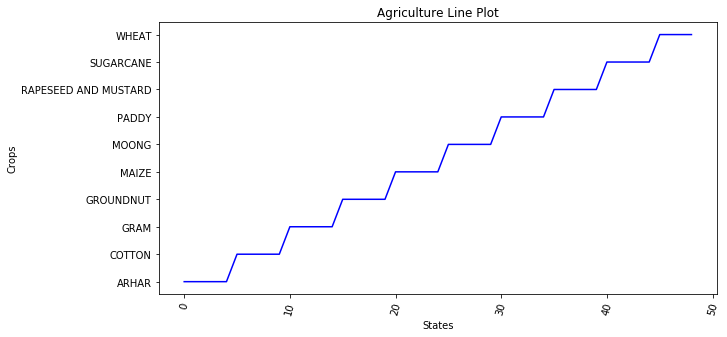

In [66]:
x= df1['State']
y= df1['Crop']
plt.figure(figsize=(10, 5))
plt.plot(y, color='blue')
plt.xlabel('States')
plt.ylabel('Crops')
plt.title('Agriculture Line Plot')
plt.xticks(rotation=75)
plt.show()
#How do I show the States on x-axis?

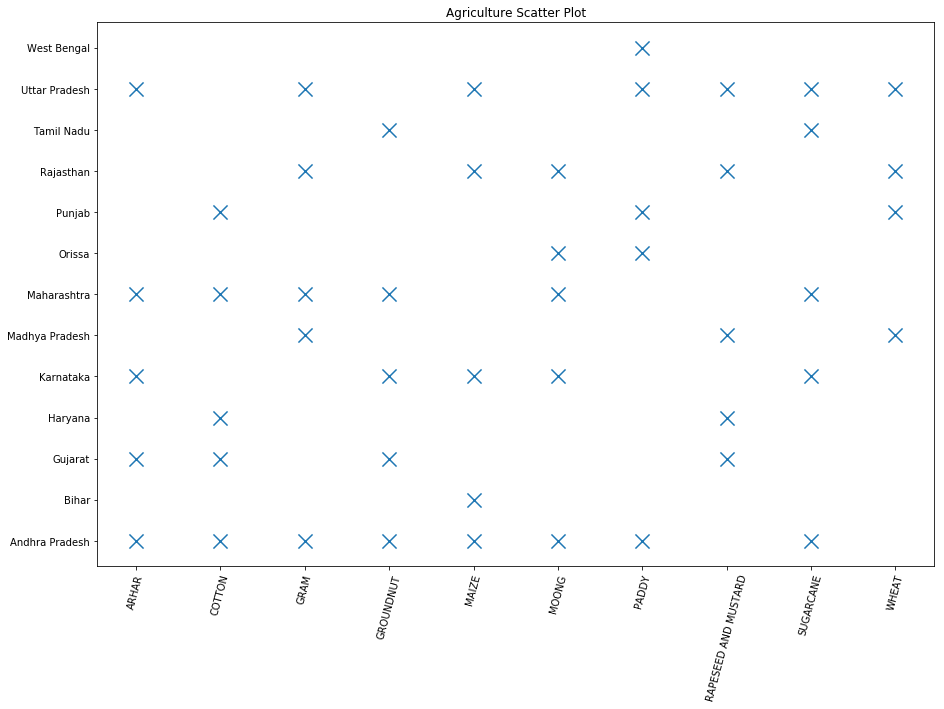

In [67]:
plt.figure(figsize=(15, 10))
plt.scatter(
    x=df1['Crop'],
    y=df1['State'],
    marker='x', s=200
)

plt.figure.autolayout : True 
plt.xticks(rotation=75)
plt.title('Agriculture Scatter Plot')


plt.show()

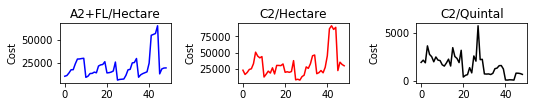

In [68]:
plt.figure(figsize=(10, 5))

plt.subplot(4, 4, 1)
plt.plot(df1['CC1'], color='blue')
plt.ylabel('Cost')
plt.title('A2+FL/Hectare')
#CC1= A2+FL/Hectare
#CC2= C2/Hectare
plt.subplot(4, 4, 2)
plt.plot(df1['CC2'], color='red')
plt.ylabel('Cost')
plt.title('C2/Hectare')

plt.subplot(4, 4, 3)
plt.plot(df1['CC3'], color='black')
plt.ylabel('Cost')
plt.title('C2/Quintal')

plt.tight_layout()
plt.show()

In [ ]:
plt.hist(x=df1['Crop']) 
plt.xticks(rotation=75)
plt.show()


plt.hist(x, normed=True) 
plt.xticks(rotation=75)
plt.show()


plt.hist(x, normed=True, color='blue', range=None, alpha=.5) 
plt.xticks(rotation=75)
plt.show()

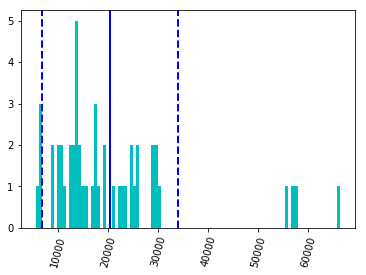

In [102]:
z=df1["CC1"]
plt.hist(z, bins=100, color = 'c') 
plt.axvline(z.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(z.mean() + z.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(z.mean()- z.std(), color='b', linestyle='dashed', linewidth=2)
plt.xticks(rotation=75)
plt.show()

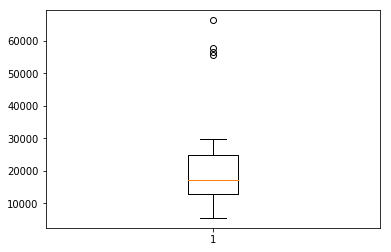

In [47]:
plt.boxplot(z)
plt.show()

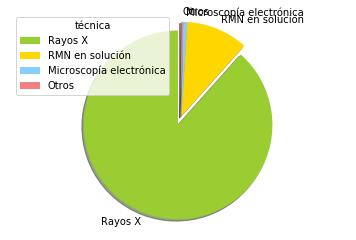

In [75]:
import matplotlib.pyplot as plt
# The slices will be ordered and plotted counter-clockwise.
labels = 'Rayos X', 'RMN en solución', 'Microscopía electrónica', 'Otros'
sizes = [88.4, 10.6, 0.7, 0.3]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=90)
plt.legend(title="técnica")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

In [76]:
import matplotlib.pyplot as plt

labels = 
sizes = [88.4, 10.6, 0.7, 0.3]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=90)
plt.legend(title="técnica")
plt.axis('equal')
plt.show()

SyntaxError: invalid syntax (<ipython-input-76-35e4fba86b7a>, line 3)

In [78]:
import statistics
np.mean(df1['CC1'])

20363.537346938778

In [79]:
np.median(df1['CC1'])

17022.0

In [81]:
(values, counts) = np.unique(df1['CC1'], return_counts=True)
ind = np.argmax(counts)
values[ind]

5483.54

In [83]:
df1['CC1'].var()
np.var(df1.CC1)

180159210.67956644

In [84]:
np.std(df1['CC1'], ddof=1)

13561.435306365034

In [85]:
np.std(df1['CC1'] ,ddof=1) / np.sqrt(len(df1['CC1']))

1937.3479009092905

In [87]:
df1.CC1.describe()

count       49.000000
mean     20363.537347
std      13561.435306
min       5483.540000
25%      12774.410000
50%      17022.000000
75%      24731.060000
max      66335.060000
Name: CC1, dtype: float64

In [90]:
df1.groupby('Crop').describe()

CC1                                                \
                     count       mean           std       min        25%   
Crop                                                                       
ARHAR                  5.0  13607.646   3461.287993   9794.05  10593.150   
COTTON                 5.0  28286.874   2582.258254  23711.44  29047.100   
GRAM                   5.0  11719.510   2441.593349   8552.69   9803.890   
GROUNDNUT              5.0  21282.782   4625.788541  13647.10  21229.010   
MAIZE                  5.0  16610.150   5139.433390  13513.92  13792.850   
MOONG                  5.0   7118.670   2095.785058   5483.54   6204.230   
PADDY                  5.0  22810.140   5433.870403  17022.00  17478.050   
RAPESEED AND MUSTARD   5.0  12260.490   2346.277108   8686.43  11385.700   
SUGARCANE              5.0  52164.716  16018.811247  24538.32  55655.440   
WHEAT                  4.0  17127.110   3152.227060  12464.40  16575.285   

                                                      CC2              \
                           50%        75%       max count        mean   
Crop                                                                    
ARHAR                 13468.82  17051.660  17130.55   5.0  21719.8460   
COTTON                29140.77  29616.090  29918.97   5.0  42958.1980   
GRAM                  12833.04  12985.950  14421.98   5.0  19308.7740   
GROUNDNUT             22507.86  22951.280  26078.66   5.0  28188.0760   
MAIZE                 14421.46  15635.430  25687.09   5.0  23837.2980   
MOONG                  6440.64   6684.180  10780.76   5.0  10776.3960   
PADDY                 24731.06  25154.750  29664.84   5.0  35768.2220   
RAPESEED AND MUSTARD  12774.41  13740.640  14715.27   5.0  21223.4320   
SUGARCANE             56621.16  57673.600  66335.06   5.0  79655.0260   
WHEAT                 18462.48  19014.305  19119.08   4.0  29923.0825   

                       ...           CC3          Yield                       \
                       ...           75%      max count     mean         std   
Crop                   ...                                                     
ARHAR                  ...     2775.8000  3670.54   5.0    8.406    1.444690   
COTTON                 ...     2509.9900  2539.47   5.0   18.772    4.206830   
GRAM                   ...     1882.6800  2277.68   5.0   10.558    3.807876   
GROUNDNUT              ...     3207.3500  3484.01   5.0   10.288    3.454058   
MAIZE                  ...      840.5800  1387.36   5.0   30.798   12.586446   
MOONG                  ...     2614.1400  5777.48   5.0    4.196    2.172149   
PADDY                  ...      732.6200   789.90   5.0   46.296   14.823799   
RAPESEED AND MUSTARD   ...     1595.5600  1610.40   5.0   14.320    3.240517   
SUGARCANE              ...      107.5600   119.72   5.0  790.496  228.486912   
WHEAT                  ...      806.1625   810.25   4.0   33.900    7.152463   

                                                               
                         min     25%     50%     75%      max  
Crop                                                           
ARHAR                   6.42    7.47    8.72    9.59     9.83  
COTTON                 12.69   17.83   19.05   19.90    24.39  
GRAM                    6.83    8.05   10.29   10.93    16.69  
GROUNDNUT               4.71    9.33   11.97   11.98    13.45  
MAIZE                  13.70   23.56   31.10   42.68    42.95  
MOONG                   1.32    3.01    4.05    5.90     6.70  
PADDY                  32.42   36.61   39.04   56.00    67.41  
RAPESEED AND MUSTARD   11.61   12.94   13.54   13.57    19.94  
SUGARCANE             448.89  744.01  757.92  986.21  1015.45  
WHEAT                  23.59   32.14   36.09   37.85    39.83  

[10 rows x 32 columns]

In [91]:
df1.Crop.value_counts()

MOONG                   5
COTTON                  5
GROUNDNUT               5
SUGARCANE               5
RAPESEED AND MUSTARD    5
ARHAR                   5
PADDY                   5
MAIZE                   5
GRAM                    5
WHEAT                   4
Name: Crop, dtype: int64

In [92]:
df1.State.value_counts()

Andhra Pradesh    8
Uttar Pradesh     7
Maharashtra       6
Rajasthan         5
Karnataka         5
Gujarat           4
Punjab            3
Madhya Pradesh    3
Haryana           2
Orissa            2
Tamil Nadu        2
Bihar             1
West Bengal       1
Name: State, dtype: int64

In [106]:
norm = np.sort(df1.CC1)

array([  5483.54,   6204.23,   6440.64,   6684.18,   8552.69,   8686.43,
         9794.05,   9803.89,  10593.15,  10780.76,  11385.7 ,  12464.4 ,
        12774.41,  12833.04,  12985.95,  13468.82,  13513.92,  13647.1 ,
        13740.64,  13792.85,  14421.46,  14421.98,  14715.27,  15635.43,
        17022.  ,  17051.66,  17130.55,  17478.05,  17945.58,  18979.38,
        19119.08,  21229.01,  22507.86,  22951.28,  23711.44,  24538.32,
        24731.06,  25154.75,  25687.09,  26078.66,  29047.1 ,  29140.77,
        29616.09,  29664.84,  29918.97,  55655.44,  56621.16,  57673.6 ,
        66335.06])

In [111]:
bernoulli= np.random.binomial(df1.CC1,df1.CC2,100)
plt.hist(bernoulli)
plt.show()

TypeError: Cannot cast array data from dtype('float64') to dtype('int32') according to the rule 'safe'

In [116]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

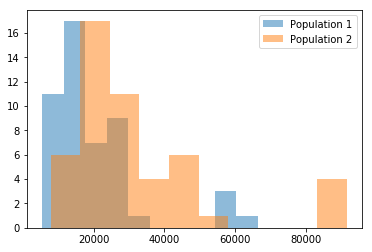

In [117]:
plt.hist(df1.CC1, alpha=0.5, label='Population 1') 
plt.hist(df1.CC2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right')
plt.show()

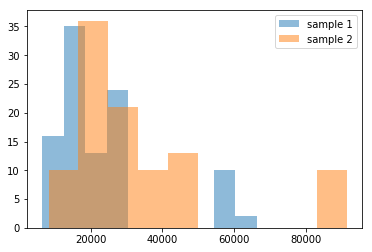

In [125]:


sample1 = np.random.choice(df1.CC1, 100, replace=True)
sample2 = np.random.choice(df1.CC2, 100, replace=True)


plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

In [126]:
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=3.7723599011246232, pvalue=0.00022040164973555142)
